## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

In [ ]:
# Task 1: Summary Statistics





# Task 2: Visualize Data Distribution





# Task 3: Checking for Null Values




## Handle Missing & Inconsistent Data Before Applying ML Models

In [ ]:
# Task 4: Drop Missing Values





# Task 5: Fill Missing Values




# Task 6: Handling Outliers with Capping





## Choose the Right Scaling Method

In [ ]:
# Task 7: Min-Max Scaling







# Task 8: Robust Scaling






# Task 9: MaxAbs Scaling






## Keep Track of Data Transformations for Reproducibility

In [ ]:
# Task 10: Log Data Preprocessing Steps






# Task 11: Store Transformation Parameters






📊 Summary Statistics:
                   ID    Area     City       Restaurant        Price  \
count     8680.000000    8680     8680             8680  8680.000000   
unique            NaN     833        9             7865          NaN   
top               NaN  Rohini  Kolkata  La Pino'Z Pizza          NaN   
freq              NaN     257     1346               13          NaN   
mean    244812.071429     NaN      NaN              NaN   348.444470   
std     158671.617188     NaN      NaN              NaN   230.940074   
min        211.000000     NaN      NaN              NaN     0.000000   
25%      72664.000000     NaN      NaN              NaN   200.000000   
50%     283442.000000     NaN      NaN              NaN   300.000000   
75%     393425.250000     NaN      NaN              NaN   400.000000   
max     466928.000000     NaN      NaN              NaN  2500.000000   

        Avg ratings  Total ratings Food type Address  Delivery time  
count   8680.000000    8680.000000      868

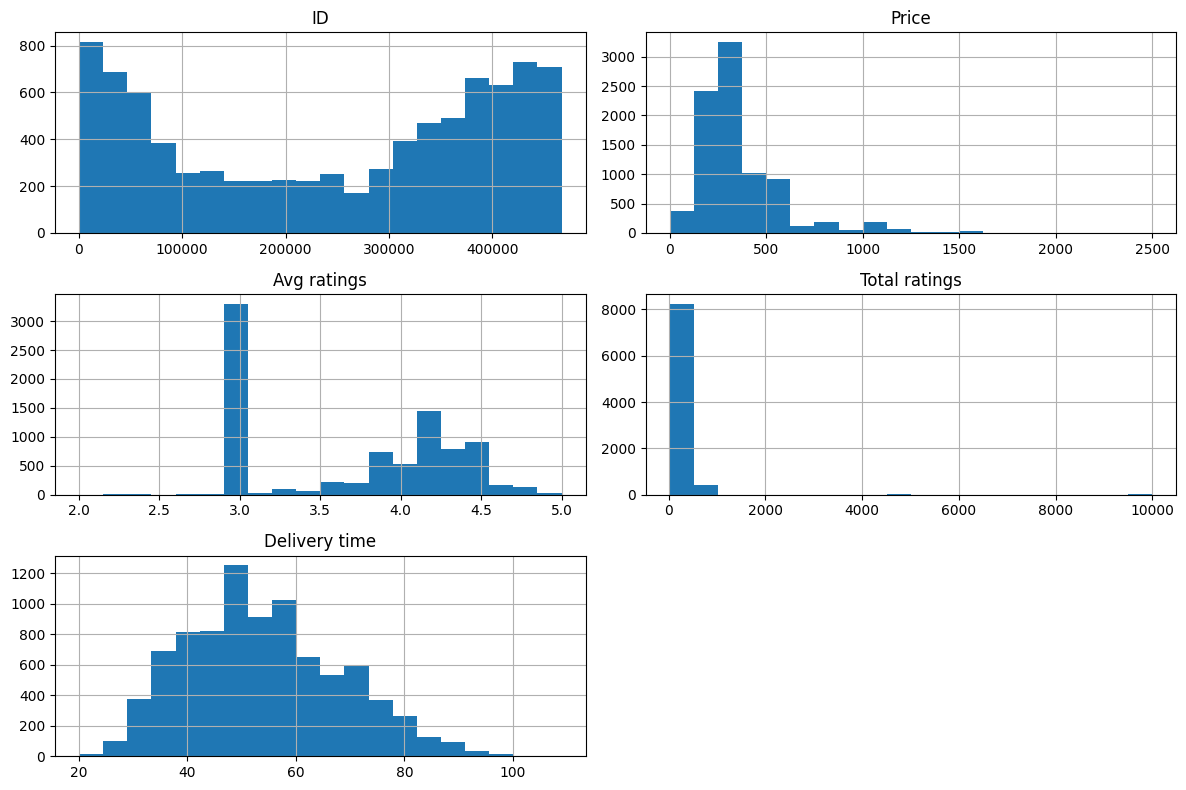


🔍 Null Values Check:
ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

✅ Shape after dropping missing values: (8680, 10)

✅ Missing values filled using mean.

✅ Outliers capped using IQR method.

✅ Min-Max Scaling applied.

✅ Robust Scaling applied.

✅ MaxAbs Scaling applied.

📘 Preprocessing Log:
- Loaded dataset
- Explored data & plotted distributions
- Checked for missing values
- Filled missing values using mean imputation
- Handled outliers using IQR capping
- Applied MinMax, Robust, and MaxAbs scalers

💾 Saved MinMaxScaler parameters to scaler_params.json


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
import json

# ------------------------------
# Step 1: Load Dataset
# ------------------------------
df = pd.read_csv("swiggy.csv")

# Automatically detect numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ------------------------------
# Task 1: Summary Statistics
# ------------------------------
print("📊 Summary Statistics:")
print(df.describe(include='all'))

# ------------------------------
# Task 2: Visualize Data Distribution
# ------------------------------
print("\n📈 Visualizing Data Distributions:")
df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# ------------------------------
# Task 3: Checking for Null Values
# ------------------------------
print("\n🔍 Null Values Check:")
print(df.isnull().sum())

# ------------------------------
# Task 4: Drop Missing Values
# ------------------------------
df_dropped = df.dropna()
print(f"\n✅ Shape after dropping missing values: {df_dropped.shape}")

# ------------------------------
# Task 5: Fill Missing Values
# ------------------------------
imputer = SimpleImputer(strategy='mean')
df_filled = df.copy()
df_filled[numerical_cols] = imputer.fit_transform(df[numerical_cols])
print("\n✅ Missing values filled using mean.")

# ------------------------------
# Task 6: Handling Outliers with Capping
# ------------------------------
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

df_capped = df_filled.copy()
for col in numerical_cols:
    df_capped[col] = cap_outliers(df_capped[col])
print("\n✅ Outliers capped using IQR method.")

# ------------------------------
# Task 7: Min-Max Scaling
# ------------------------------
minmax_scaler = MinMaxScaler()
df_minmax = df_capped.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])
print("\n✅ Min-Max Scaling applied.")

# ------------------------------
# Task 8: Robust Scaling
# ------------------------------
robust_scaler = RobustScaler()
df_robust = df_capped.copy()
df_robust[numerical_cols] = robust_scaler.fit_transform(df_robust[numerical_cols])
print("\n✅ Robust Scaling applied.")

# ------------------------------
# Task 9: MaxAbs Scaling
# ------------------------------
maxabs_scaler = MaxAbsScaler()
df_maxabs = df_capped.copy()
df_maxabs[numerical_cols] = maxabs_scaler.fit_transform(df_maxabs[numerical_cols])
print("\n✅ MaxAbs Scaling applied.")

# ------------------------------
# Task 10: Log Data Preprocessing Steps
# ------------------------------
log = []
log.append("Loaded dataset")
log.append("Explored data & plotted distributions")
log.append("Checked for missing values")
log.append("Filled missing values using mean imputation")
log.append("Handled outliers using IQR capping")
log.append("Applied MinMax, Robust, and MaxAbs scalers")

print("\n📘 Preprocessing Log:")
for entry in log:
    print("- " + entry)

# ------------------------------
# Task 11: Store Transformation Parameters
# ------------------------------
scaler_params = {
    'mean_': minmax_scaler.min_.tolist(),
    'scale_range': minmax_scaler.data_range_.tolist(),
    'feature_names': numerical_cols
}

with open("scaler_params.json", "w") as f:
    json.dump(scaler_params, f)

print("\n💾 Saved MinMaxScaler parameters to scaler_params.json")
